# **Email Spam Or Ham Classification By NLP**

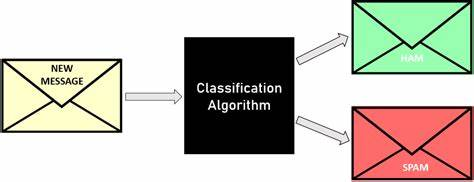

In [ ]:
i = Image.open(r'C:\Users\kumar\Desktop\email.jfif') i

# **(1). Importing Required Libraries**

In [ ]:
import pandas as pd
from PIL import Image
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **(2) . Load the dataset**

In [ ]:
df = pd.read_csv(r'A:\MTECH(Data Science)\DataSet\P\emails.csv')
df.sample(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4150,Email 4151,9,3,8,5,1,2,53,0,5,...,0,0,0,0,0,0,0,0,0,0
1106,Email 1107,2,3,1,1,0,0,15,5,0,...,0,0,0,0,0,0,0,0,0,1
4537,Email 4538,20,7,1,6,9,7,94,1,3,...,0,0,0,0,0,0,0,1,0,0
2481,Email 2482,0,1,1,0,2,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2347,Email 2348,0,0,1,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(5172, 3002)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


# **(3) . Fetch Columns Excluding 'Email No.' and 'Prediction'**

In [ ]:
word_columns = df.columns[1:-1]
word_columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

# **(4) . Generate text for each email**

In [ ]:
texts = []
for index, row in df.iterrows():
    words = []
    for word in word_columns:
        frequency = row[word]
        if frequency > 0:
            words.extend([word] * frequency)
    email_text = ' '.join(words)
    texts.append(email_text)

In [ ]:
texts

['ect a a is i i s s s as re re e e e e t t t t j m m b p c c c r r r r f h u u tu st ic far chris hr rm tr pictures pi ma picture ct ct christmas ur tm',
 'the the the the the the the the to to to to to to to to to to to to to ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect and and and and and and for for for for for for of of a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a you hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou in in in in in in in in in in in in in in in in in in on on on on on on on on on on on on on on on on on on on on on is is is is is is is is is is is is is enron i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i be be be be that that 

# **(5). Print the generated text for each email**

In [ ]:
# for email_no, text in enumerate(texts):
    # print(f"{email_no}: {text}\n")
# Print only the first 10 entries to avoid exceeding the data rate limit
for email_no, text in enumerate(texts[:10]):
    print(f"{email_no}: {text}\n")

0: ect a a is i i s s s as re re e e e e t t t t j m m b p c c c r r r r f h u u tu st ic far chris hr rm tr pictures pi ma picture ct ct christmas ur tm

1: the the the the the the the the to to to to to to to to to to to to to ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect ect and and and and and and for for for for for for of of a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a you hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou hou in in in in in in in in in in in in in in in in in in on on on on on on on on on on on on on on on on on on on on on is is is is is is is is is is is is is enron i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i be be be be that that

# **(6). Create a new DataFrame with 'Email No.', 'text', and 'Prediction' columns**

In [ ]:
new_df = pd.DataFrame({
    'Email No.': df['Email No.'],
    'text': texts,
    'Prediction': df['Prediction']
})

In [ ]:
new_df

,Email No.,text,Prediction
0,Email 1,ect a a is i i s s s as re re e e e e t t t t ...,0
1,Email 2,the the the the the the the the to to to to to...,0
2,Email 3,ect a a a a a a a a in in in in on on i i i i ...,0
3,Email 4,to to to to to ect ect ect ect ect ect ect ect...,0
4,Email 5,the the the the the the the to to to to to to ...,0
...,...,...,...
5167,Email 5168,the the to to ect ect and and and a a a a a a ...,0
5168,Email 5169,the the the the the the the the the the the th...,0
5169,Email 5170,ect and a a a a a a a a a a a in on is is is t...,1
5170,Email 5171,the the to to to to to to to ect for for of a ...,1


# **(7). Function to preprocess the text**
  - i. Remove punctuation and numbers
  - ii. Convert to lowercase
  - iii. Tokenize the text
  - iv. Remove stopwords

In [ ]:
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Join the words back into a single string
    return ' '.join(words)

# **(8) . Apply preprocessing to the text column**

In [ ]:
new_df['text'] = new_df['text'].apply(preprocess_text)

# **(9) . Create a CountVectorizer object**

In [ ]:
vectorizer = CountVectorizer()

# **(10) . Transform the text data into feature vectors**

In [ ]:
X = vectorizer.fit_transform(new_df['text'])

In [ ]:
X

<5172x2847 sparse matrix of type '<class 'numpy.int64'>'
	with 578797 stored elements in Compressed Sparse Row format>

# **(11) . Convert 'Prediction' to binary format**

In [ ]:
y = new_df['Prediction']

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

# **(12) . Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

<3620x2847 sparse matrix of type '<class 'numpy.int64'>'
	with 401462 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

1023    0
4587    0
4415    0
4863    1
4901    0
       ..
4426    0
466     0
3092    0
3772    1
860     1
Name: Prediction, Length: 3620, dtype: int64

# **(13) . Create a Multinomial Naive Bayes classifier**

In [ ]:
model = MultinomialNB()

# **(14) . Train the classifier**

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

# **(15) . Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)

# **(16) . Calculate accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9458762886597938


# **(17) . Print confusion matrix and classification report**

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1038   59]
 [  25  430]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1097
           1       0.88      0.95      0.91       455

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



# **(18) . Function to predict if a new email is spam or ham based on raw text**

In [ ]:
def predict_email(model, vectorizer, email_text):
    # Preprocess the email text
    processed_text = preprocess_text(email_text)
    # Transform the text using the trained vectorizer
    vectorized_text = vectorizer.transform([processed_text])
    # Make a prediction using the trained model
    prediction = model.predict(vectorized_text)
    # Map the prediction to a label
    return 'spam' if prediction[0] == 1 else 'ham'

# **(19) . predict if a new email is spam or ham**

In [ ]:
new_email = "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."
result = predict_email(model, vectorizer, new_email)
print(f'The email is classified as: {result}')

The email is classified as: spam


In [ ]:
new_email = """Subject: Important Update on Your Account

Dear [Recipient's Name],

We hope this email finds you well.

We are writing to inform you about some important updates to your account. Recently, we have made improvements to our security systems to better protect your personal information. As part of this enhancement, we recommend that you review your account settings and update your password to ensure it meets our new security standards.

To update your password, please follow these steps:
1. Log in to your account on our website.
2. Navigate to the "Account Settings" section.
3. Click on "Change Password" and follow the on-screen instructions.

If you have any questions or need assistance, our customer support team is available 24/7. You can reach us by replying to this email or calling our support hotline at 1-800-123-4567.

Thank you for your continued trust in our services.

Best regards,
[Your Company's Name]
Customer Support Team
"""

result = predict_email(model, vectorizer, new_email)
print(f'The email is classified as: {result}')


The email is classified as: ham


In [ ]:
new_email = """Subject: URGENT: You've Won a $1,000 Walmart Gift Card!

Congratulations [Recipient's Name]!

You are the lucky winner of a $1,000 Walmart Gift Card! To claim your prize, all you have to do is click the link below and provide your information.

>> Click here to claim your $1,000 Walmart Gift Card now! <<

Hurry! This offer is only valid for the next 24 hours. Don't miss out on this amazing opportunity!

Best regards,
The Walmart Rewards Team
"""

result = predict_email(model, vectorizer, new_email)
print(f'The email is classified as: {result}')


The email is classified as: spam


# **************************************************************************

## Name - Aatish Kumar Baitha
  - M.Tech(Data Science 2nd Year Student)
- My Linkedin Profile -
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- My Blog
  - https://computersciencedatascience.blogspot.com/
- My Github Profile
  - https://github.com/Aatishkb

# **Thank you!**

# **************************************************************************